In [490]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [491]:
from IPython.display import display, HTML
CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

# 데이터 불러오기 및 전처리

In [492]:
df = pd.read_csv('2015_data.csv')
df.head()

,번호,성별,연령,시도,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),...,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
0,1,2,15,45,155,60,88,0.6,0.7,1.0,...,43,91.0,9.8,1.0,1.1,17,28,23,1.0,1.0
1,2,2,15,11,155,65,98,1.2,0.6,1.0,...,53,79.0,13.5,1.0,1.0,25,30,41,1.0,1.0
2,3,2,11,26,155,65,85,1.2,0.9,1.0,...,73,95.0,13.0,1.0,0.6,18,16,25,1.0,0.0
3,4,1,9,41,175,75,89,0.2,0.2,1.0,...,38,80.0,15.1,1.0,0.9,28,40,50,1.0,1.0
4,5,1,16,47,160,50,78,0.5,0.6,2.0,...,55,123.0,14.4,3.0,1.0,20,13,19,2.0,0.0


In [493]:
df=df[['성별', '연령', '시도', '신장', '체중', '허리둘레', '식전혈당', '총콜레스테롤', '트리글리세라이드','HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부']]
df.head()

,성별,연령,시도,신장,체중,허리둘레,식전혈당,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
0,2,15,45,155,60,88,180,169,175,43,91.0,9.8,17,28,23,1.0,1.0
1,2,15,11,155,65,98,179,162,150,53,79.0,13.5,25,30,41,1.0,1.0
2,2,11,26,155,65,85,206,182,67,73,95.0,13.0,18,16,25,1.0,0.0
3,1,9,41,175,75,89,110,168,249,38,80.0,15.1,28,40,50,1.0,1.0
4,1,16,47,160,50,78,104,197,94,55,123.0,14.4,20,13,19,2.0,0.0


In [494]:
df.columns = df.columns.str.replace("(","")
df.columns = df.columns.str.replace("혈청지오티","")
df.columns = df.columns.str.replace(")","")
df.columns

Index(['성별', '연령', '시도', '신장', '체중', '허리둘레', '식전혈당', '총콜레스테롤', '트리글리세라이드',
       'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', 'AST', 'ALT', '감마지티피', '흡연상태', '음주여부'],
      dtype='object')

In [495]:
df.dtypes

성별            int64
연령            int64
시도            int64
신장            int64
체중            int64
허리둘레          int64
식전혈당          int64
총콜레스테롤        int64
트리글리세라이드      int64
HDL콜레스테롤      int64
LDL콜레스테롤    float64
혈색소         float64
AST           int64
ALT           int64
감마지티피         int64
흡연상태        float64
음주여부        float64
dtype: object

In [496]:
df.replace({'성별' : {1:'male', 2:'female'}}, inplace=True)

In [497]:
df.replace({'시도' : {11 : '서울', 26 : '부산', 27 : '대구',
                    28 : '인천', 29 : '광주', 30 : '대전',
                    31 : '울산', 36 : '세종', 41 : '경기',
                    42 : '강원', 43 : '충북', 44 : '충남',
                    45 : '전북', 46 : '전남', 47 : '경북',
                    48 : '경남', 49 : '제주'}}, inplace=True)

In [498]:
df.replace({'연령' : {5:20, 6:25, 7:30, 8:35, 9:40, 10:45, 11:50, 12:55, 13:60, 14:65, 15:70, 16:75, 17:80, 18:85}}, inplace=True)

In [499]:
df.head()

,성별,연령,시도,신장,체중,허리둘레,식전혈당,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,AST,ALT,감마지티피,흡연상태,음주여부
0,female,70,전북,155,60,88,180,169,175,43,91.0,9.8,17,28,23,1.0,1.0
1,female,70,서울,155,65,98,179,162,150,53,79.0,13.5,25,30,41,1.0,1.0
2,female,50,부산,155,65,85,206,182,67,73,95.0,13.0,18,16,25,1.0,0.0
3,male,40,경기,175,75,89,110,168,249,38,80.0,15.1,28,40,50,1.0,1.0
4,male,75,경북,160,50,78,104,197,94,55,123.0,14.4,20,13,19,2.0,0.0


# 성별 구분

In [553]:
sex=pd.value_counts(df['성별'].values, sort=False)
sex

female    461937
male      538063
dtype: int64

In [561]:
df_sex=df.set_index('성별').sort_index()
df_sex.head(50)

,연령,시도,신장,체중,허리둘레,식전혈당,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,AST,ALT,감마지티피,흡연상태,음주여부,bmi
성별,,,,,,,,,,,,,,,,,
female,70,전북,155,60,88,180,169,175,43,91.0,9.8,17,28,23,1.0,1.0,24.973985
female,35,울산,160,55,84,79,168,87,40,110.0,12.3,18,9,12,1.0,1.0,21.484375
female,85,경남,150,40,75,83,250,172,40,176.0,11.2,20,10,22,1.0,1.0,17.777778
female,35,경남,155,65,75,102,223,61,74,136.0,14.9,20,15,22,1.0,1.0,27.055151
female,55,제주,155,60,80,90,161,105,44,96.0,11.4,16,11,12,1.0,1.0,24.973985
female,35,서울,165,65,75,74,172,66,56,102.0,10.1,19,19,15,1.0,0.0,23.875115
female,65,경남,155,45,70,100,213,88,76,119.0,12.9,24,19,19,1.0,1.0,18.730489
female,30,전남,160,55,72,91,195,50,65,120.0,11.3,28,21,14,1.0,1.0,21.484375
female,35,대전,155,55,64,90,212,81,66,110.0,13.9,19,14,22,1.0,0.0,22.892820


In [573]:
df_female=df_sex[:461937]
df_male=df_sex[461937:]

# 조사대상자 분석

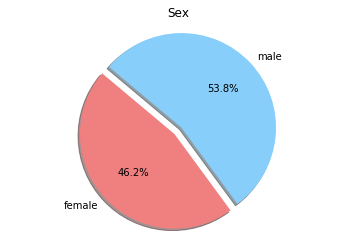

In [575]:
labels = 'female', 'male'
sizes = sex
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Sex')
plt.show()

In [576]:
drink=pd.value_counts(df['음주여부'].values, sort=False)
drink

0.0    499677
1.0    499487
dtype: int64

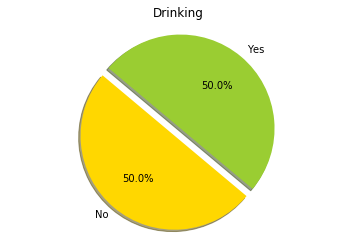

In [577]:
labels = 'No', 'Yes'
sizes = drink
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Drinking')
plt.axis('equal')
plt.show()

In [506]:
m_drink=pd.value_counts(df_male['음주여부'].values, sort=False)
m_drink

0.0    184499
1.0    353045
dtype: int64

In [578]:
f_drink=pd.value_counts(df_female['음주여부'].values, sort=False)
f_drink

1.0    327855
0.0    133598
dtype: int64

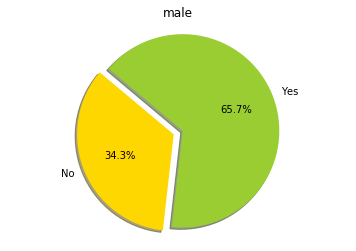

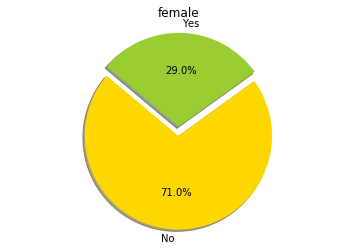

In [579]:
labels = 'No', 'Yes'
sizes = m_drink
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('male')
plt.show()

labels = 'No', 'Yes'
sizes = f_drink
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140) 
plt.axis('equal')
plt.title('female')
plt.show()

In [580]:
smoke=pd.value_counts(df['흡연상태'].values, sort=False)
smoke

2.0    178323
3.0    217997
1.0    603279
dtype: int64

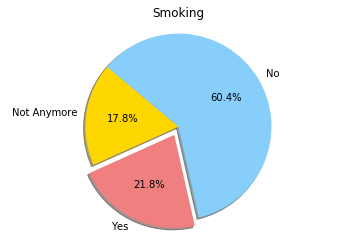

In [581]:
labels = 'Not Anymore', 'Yes', 'No'
sizes = smoke
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0, 0.1,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Smoking') 
plt.axis('equal')
plt.show()

In [582]:
smoke_ma=pd.value_counts(df_male['흡연상태'].values, sort=False)
smoke_ma

2.0    168275
3.0    202988
1.0    166641
dtype: int64

In [583]:
smoke_fe=pd.value_counts(df_female['흡연상태'].values, sort=False)
smoke_fe

1.0    436638
2.0     10048
3.0     15009
dtype: int64

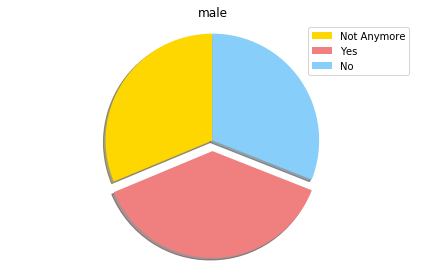

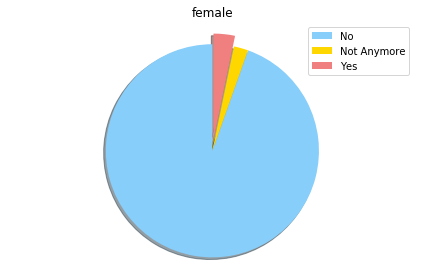

In [585]:
labels = 'Not Anymore', 'Yes', 'No'
sizes = smoke_ma
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0, 0.1, 0)  # explode 1st slice

# Plot
patches, texts = plt.pie(sizes, colors=colors, explode=explode, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title('male')
plt.axis('equal')
plt.tight_layout()
plt.show()

labels = 'No', 'Not Anymore', 'Yes'
sizes = smoke_fe
colors = ['lightskyblue', 'gold', 'lightcoral']
explode = (0, 0, 0.1)  # explode 1st slice

# Plot
patches, texts = plt.pie(sizes, colors=colors, explode=explode, shadow=True, startangle=90,)
plt.legend(patches, labels, loc="best")
plt.title('female')
plt.axis('equal')
plt.tight_layout()
plt.show()

# bmi 분석

In [586]:
df['bmi']=df.체중/(df.신장*0.01)**2
df.head()

,성별,연령,시도,신장,체중,허리둘레,식전혈당,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,AST,ALT,감마지티피,흡연상태,음주여부,bmi
0,female,70,전북,155,60,88,180,169,175,43,91.0,9.8,17,28,23,1.0,1.0,24.973985
1,female,70,서울,155,65,98,179,162,150,53,79.0,13.5,25,30,41,1.0,1.0,27.055151
2,female,50,부산,155,65,85,206,182,67,73,95.0,13.0,18,16,25,1.0,0.0,27.055151
3,male,40,경기,175,75,89,110,168,249,38,80.0,15.1,28,40,50,1.0,1.0,24.489796
4,male,75,경북,160,50,78,104,197,94,55,123.0,14.4,20,13,19,2.0,0.0,19.531250


In [587]:
df_male.head()

,연령,시도,신장,체중,허리둘레,식전혈당,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,AST,ALT,감마지티피,흡연상태,음주여부,bmi
성별,,,,,,,,,,,,,,,,,
male,40,충북,160,50,67,95,186,73,137,34.0,14.2,18,10,34,3.0,0.0,19.531250
male,60,경기,170,75,96,110,209,150,69,110.0,14.9,50,61,108,2.0,0.0,25.951557
male,40,전북,170,75,85,96,282,80,60,205.0,15.2,41,39,33,1.0,0.0,25.951557
male,60,경기,170,70,91,98,167,258,40,75.0,15.1,15,12,26,2.0,0.0,24.221453
male,40,전남,180,90,84,78,198,166,38,126.0,14.3,28,34,29,1.0,1.0,27.777778


In [588]:
df2 = pd.read_csv('exercise_data.csv')
df2

,시도,시군구별(1),응답자수 (명),표준화율 (%)
0,11,서울특별시,22993,21.8
1,26,부산광역시,14604,25.5
2,27,대구광역시,7326,22.1
3,28,인천광역시,9010,21.7
4,29,광주광역시,4599,23.3
5,30,대전광역시,4580,23.0
6,31,울산광역시,4566,22.6
7,36,세종특별자치시,924,21.6
8,41,경기도,41168,22.1
9,42,강원도,15876,22.1


In [589]:
df2.columns = df2.columns.str.replace("(","")
df2.columns = df2.columns.str.replace(")","")
df2.columns = df2.columns.str.replace(" ","")
df2.columns = df2.columns.str.replace("%","")
df2.columns = df2.columns.str.replace("별","")
df2.columns = df2.columns.str.replace("1","")
df2.columns = df2.columns.str.replace("명","")
df2.columns = df2.columns.str.replace("표준화율","운동자비율")
df2.columns

Index(['시도', '시군구', '응답자수', '운동자비율'], dtype='object')

In [590]:
grouped_ex=df2[['시도', '운동자비율']]
grouped_ex=DataFrame(df2.groupby('시도')['운동자비율'].mean())
grouped_ex

,운동자비율
시도,
11,21.8
26,25.5
27,22.1
28,21.7
29,23.3
30,23.0
31,22.6
36,21.6
41,22.1


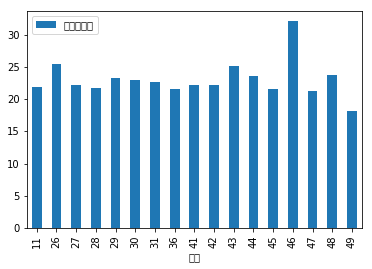

In [591]:
grouped_ex.plot(kind='bar')
#전남(46), 부산(26)이 높고, 제주(49), 전북(45), 경북(47)이 낮다.

In [592]:
grouped_ex.rename(index = {11 : '서울', 26 : '부산', 27 : '대구',
                    28 : '인천', 29 : '광주', 30 : '대전',
                    31 : '울산', 36 : '세종', 41 : '경기',
                    42 : '강원', 43 : '충북', 44 : '충남',
                    45 : '전북', 46 : '전남', 47 : '경북',
                    48 : '경남', 49 : '제주'}, inplace=True)
grouped_ex

,운동자비율
시도,
서울,21.8
부산,25.5
대구,22.1
인천,21.7
광주,23.3
대전,23.0
울산,22.6
세종,21.6
경기,22.1


In [593]:
grouped_bmi=DataFrame(df.groupby('시도')['bmi'].mean())
grouped_bmi

,bmi
시도,
강원,24.497359
경기,24.160400
경남,24.019274
경북,24.053755
광주,23.994333
대구,23.888196
대전,24.003556
부산,23.994865
서울,23.939377


In [594]:
grouped_bmi['bmi'].corr(grouped_ex['운동자비율'])

-0.09897659590724388

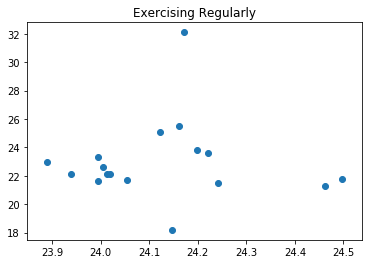

In [595]:
plt.title('Exercising Regularly')
plt.scatter(grouped_bmi['bmi'], grouped_ex['운동자비율'])

In [596]:
df3 = pd.read_csv('population.csv')
df3

,시도,행정구역별,인구밀도
0,11,서울특별시,16364.0
1,26,부산광역시,4479.9
2,27,대구광역시,2791.0
3,28,인천광역시,2755.5
4,29,광주광역시,2998.8
5,30,대전광역시,2852.3
6,31,울산광역시,1099.6
7,36,세종특별자치시,439.0
8,41,경기도,1226.4
9,42,강원도,90.2


In [597]:
grouped_pop=DataFrame(df3.groupby('시도')['인구밀도'].mean())
grouped_pop

,인구밀도
시도,
11,16364.0
26,4479.9
27,2791.0
28,2755.5
29,2998.8
30,2852.3
31,1099.6
36,439.0
41,1226.4


In [598]:
grouped_pop.rename(index = {11 : '서울', 26 : '부산', 27 : '대구',
                    28 : '인천', 29 : '광주', 30 : '대전',
                    31 : '울산', 36 : '세종', 41 : '경기',
                    42 : '강원', 43 : '충북', 44 : '충남',
                    45 : '전북', 46 : '전남', 47 : '경북',
                    48 : '경남', 49 : '제주'}, inplace=True)
grouped_pop

,인구밀도
시도,
서울,16364.0
부산,4479.9
대구,2791.0
인천,2755.5
광주,2998.8
대전,2852.3
울산,1099.6
세종,439.0
경기,1226.4


In [599]:
grouped_bmi['bmi'].corr(grouped_pop['인구밀도'])

-0.4394396452225851

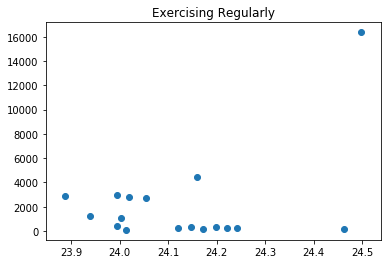

In [600]:
plt.title('Exercising Regularly')
plt.scatter(grouped_bmi['bmi'], grouped_pop['인구밀도'])

In [601]:
grouped_age=DataFrame(df.groupby('시도')['연령'].mean())
grouped_age

,연령
시도,
강원,48.966318
경기,45.722505
경남,46.756663
경북,48.509410
광주,46.602075
대구,47.296314
대전,46.557342
부산,48.041452
서울,46.851647


# 지역별 트리글리세라이드

In [602]:
grouped_tri=df[['시도','트리글리세라이드']]
grouped_tri=DataFrame(df.groupby('시도')['트리글리세라이드'].mean())
grouped_tri

,트리글리세라이드
시도,
강원,132.641502
경기,130.728673
경남,129.813652
경북,131.146105
광주,129.039138
대구,127.709011
대전,130.267160
부산,127.789820
서울,124.080090


In [603]:
grouped_tri['트리글리세라이드'].corr(grouped_pop['인구밀도'])

-0.3931051125614732

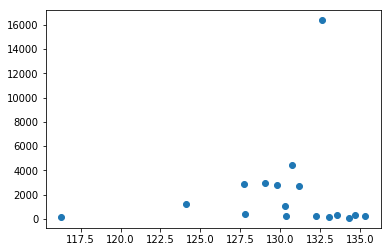

In [604]:
plt.scatter(grouped_tri['트리글리세라이드'], grouped_pop['인구밀도'])

In [605]:
grouped_tri_age=df_female[['트리글리세라이드', '연령']]
grouped_tri_age=DataFrame(df_female.groupby('연령')['트리글리세라이드'].mean())
grouped_tri_age

,트리글리세라이드
연령,
20,71.485978
25,75.643154
30,83.035607
35,87.635611
40,93.733777
45,102.947311
50,113.937576
55,119.437701
60,124.791046


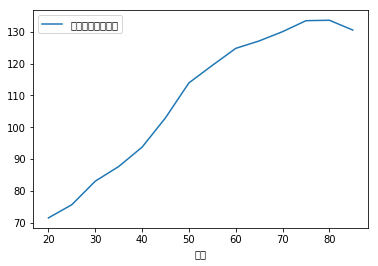

In [606]:
grouped_tri_age.plot()

# 간기능 검사

In [607]:
df['AST'].corr(df['ALT'])

0.7485456588571434

In [608]:
df['감마지티피'].corr(df['ALT'])

0.4446585230424645

In [609]:
df['AST'].corr(df['감마지티피'])

0.4564467365760908

In [610]:
df['음주여부'].corr(df['감마지티피'])

-0.21139403159373424

In [611]:
grouped_gtp=df_male[['음주여부','감마지티피']]
grouped_gtp=DataFrame(df_male.groupby('음주여부')['감마지티피'].mean())
grouped_gtp.rename(index = {0.0 : 'drinker', 1.0 : 'non-drinker'}, inplace=True)
grouped_gtp

,감마지티피
음주여부,
drinker,56.128103
non-drinker,34.758332


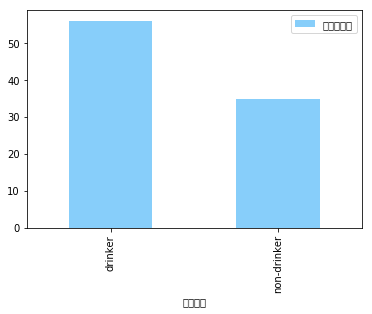

In [612]:
grouped_gtp.plot(kind='bar', color='lightskyblue')

# 혈색소 

적혈구 안에 있는 혈색소가 포도당과 결합하여 당화혈색소를 형성, 
당화혈색소 증가는 당뇨합병증과 관련

In [613]:
df['흡연상태'].corr(df['혈색소'])

0.45245066575449644

In [614]:
grouped_blood=df[['흡연상태','혈색소']]
grouped_blood=DataFrame(df.groupby('흡연상태')['혈색소'].mean())
grouped_blood

,혈색소
흡연상태,
1.0,13.504908
2.0,14.886897
3.0,15.207411


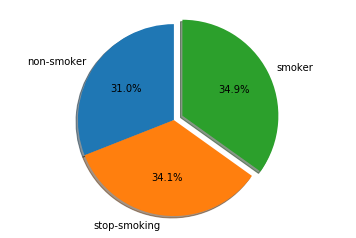

In [615]:
labels = 'non-smoker', 'stop-smoking', 'smoker'
sizes = [13.504908, 14.886897, 15.207411]
explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()